## 

## Stochastic RSI  : Case Study with Microsoft Stocks

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf

In [36]:
today=datetime.today().strftime("%Y-%m-%d")

In [37]:
data=yf.download("MSFT", start="2021-01-01", end=today)

[*********************100%***********************]  1 of 1 completed


#### Defining an exponential moving average function:

In [38]:
def EMA(data, period=20, column="Close"):
    return data[column].ewm(span=period, adjust=False).mean()

#### Defining a stochastic RSI function:  

The window will be 14 days for that little case study.

In [43]:
def StochRSI(data, window=14, column="Close"):
    delta = data[column].diff(1)
    delta = delta.dropna()
    positive= delta.copy()
    negative=delta.copy()
    positive[positive<0]=0
    negative[negative>0]=0
    data['+']= positive
    data["-"]= negative
    AVG_Gain=EMA(data, window, column="+")
    AVG_Loss=abs(EMA(data, window, column="-"))
    RS=AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    
    stockRSI=(RSI-RSI.rolling(window).min())/(RSI.rolling(window).max()-RSI.rolling(window).min())
    return stockRSI

    
    
    

In [44]:
data['StochRSI']=StochRSI(data)


**Following the idea promoted by Constance Brown, we will use the threshold of 0.70 to indicate that we are in an overselling trend and 0.30 for an overbought trend :**

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871., 18901., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

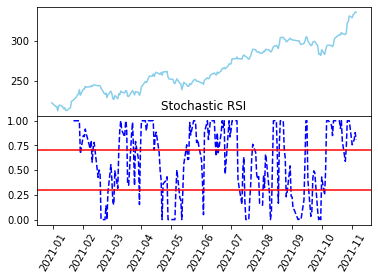

In [52]:
fig,(ax1,ax2)=plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)
plt.title("Stochastic RSI")
ax1.plot(data.index, data["Close"], color="skyblue")
ax2.plot(data.index, data["StochRSI"], color="b", linestyle="--") 
ax2.axhline(0.30, color="r")
ax2.axhline(0.70, color="r")
plt.xticks(rotation=60 )
